#### Introduction/Business Problem

Opening a resturant can be a very profitable business but lack of demand can cause many resturants to close within the first year of opening. Success of a resturant depends on many factors, to name a few - location, competition and quality of the food.
This project tries to find an optimal recomendation for opening an Indian resturant in Toronto by taking all the above mentioned factors in
consideration.
Foursquare API has been used to determine the optimal location to open an Indian Restaurant. For Indian Restaurant specifically, location and competition are both considered while providing a recomendation. If there are too many Indian Restaurants in the local vicinity, the profitability of the restaurant may severily decrease. Additionally, opening a restaurant in a higher income location would increase the profitability of the business compared to opening the resturant in a poor income locality.

#### Business Problem

What areas are the best options for opening an Indian Restaurant in Toronto?

#### Data

Foursquare API is used to determine the average house price in different neighborhoods which helps in estimating the average income of the inhabitants. Foursquare API is also used in determing population distribution of each area, the number of Indian Restaurant in each neighborhood and the number of total restaurant in each neighborhood. The data is then used to cluster different postal codes to determine the optimal location to open the restaurant.

In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium 


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a04ba1af8891466484257ae166722482 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='YOUR-KEY',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_a04ba1af8891466484257ae166722482.get_object(Bucket='openindianrestaurantsintoronto-donotdelete-pr-vuqrwgfgqfsul2',Key='Toronto_neighborhood.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

toronto_df = pd.read_excel(body)
toronto_df.head()


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [4]:

body = client_a04ba1af8891466484257ae166722482.get_object(Bucket='openindianrestaurantsintoronto-donotdelete-pr-vuqrwgfgqfsul2',Key='neighborhood_data.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

neighborhood_data = pd.read_excel(body)
neighborhood_data.head()


,PostalCode,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M1B,Scarborough,263,90290,6208,45.74,26825,290,240,420,720,730,925,955,1090,1055,1110,2330,2150,1930,1845,1640,9340,3355,2315,2390,1300,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
1,M1C,Scarborough,134,12494,2403,5.20,3700,60,25,45,60,70,80,90,120,80,115,230,230,200,195,210,1890,490,410,550,440,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49
2,M1E,Scarborough,411,54764,8570,19.04,19855,315,540,815,970,880,890,905,885,905,815,1565,1360,1255,1140,1050,5570,1970,1320,1390,915,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03
3,M1G,Scarborough,137,53485,4345,12.31,18445,435,455,685,1170,825,960,910,950,955,815,1725,1405,1240,1070,865,3980,1660,1030,855,430,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36
4,M1H,Scarborough,127,29960,4011,7.47,10765,615,220,255,450,370,475,465,520,495,530,935,845,765,615,575,2625,1015,700,635,275,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77


In [5]:
neighborhood_data.dropna() 

,PostalCode,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M1B,Scarborough,263,90290,6208,45.74,26825,290,240,420,720,730,925,955,1090,1055,1110,2330,2150,1930,1845,1640,9340,3355,2315,2390,1300,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
1,M1C,Scarborough,134,12494,2403,5.20,3700,60,25,45,60,70,80,90,120,80,115,230,230,200,195,210,1890,490,410,550,440,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49
2,M1E,Scarborough,411,54764,8570,19.04,19855,315,540,815,970,880,890,905,885,905,815,1565,1360,1255,1140,1050,5570,1970,1320,1390,915,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03
3,M1G,Scarborough,137,53485,4345,12.31,18445,435,455,685,1170,825,960,910,950,955,815,1725,1405,1240,1070,865,3980,1660,1030,855,430,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36
4,M1H,Scarborough,127,29960,4011,7.47,10765,615,220,255,450,370,475,465,520,495,530,935,845,765,615,575,2625,1015,700,635,275,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77
5,M1J,Scarborough,139,16724,5395,3.10,5920,105,180,305,330,325,345,370,345,325,355,570,420,355,300,220,1080,410,240,230,195,33.01,2.33,19.91,5.68,1.67,0.84,0.42,3.41,0.12,0.12,26.13
6,M1K,Scarborough,125,13641,7031,1.94,5165,120,95,205,250,240,295,295,295,340,295,465,440,400,280,260,900,405,250,185,70,27.34,4.40,12.50,17.59,1.65,1.72,0.99,1.28,0.26,0.07,26.83
7,M1L,Scarborough,302,56512,26604,10.30,20800,480,580,1000,1160,1095,1135,1155,1110,1140,1055,1790,1545,1270,1095,975,4250,1735,1005,1045,465,31.84,5.75,12.58,6.93,1.27,0.74,0.98,2.23,0.55,0.40,31.57
8,M1M,Scarborough,385,55834,14094,13.83,20390,305,420,780,1120,1100,1105,1075,1065,1060,980,1755,1430,1330,1125,910,4825,1760,1150,1155,745,23.88,4.92,12.26,11.01,1.36,0.84,0.88,1.50,0.27,0.43,36.61
9,M1N,Scarborough,122,22291,3765,5.92,9200,165,290,320,335,405,330,315,340,330,310,650,595,525,475,465,3345,935,670,825,930,6.30,5.34,3.99,3.72,1.01,0.47,1.19,0.43,0.13,0.87,71.51


In [6]:
#combine two dataframe
PostCode = []
Borough=[]
Neighborhood=[]
Population=[]
Longitude = []
Latitude = []
P_density = []
Area = []
P1 = []
P2 = []
P3 = []
P4 = []
P5 = []
P6 = []
P7 = []
P8 = []
P9 = []
P10 = []
P11 = []
P12 = []
P13 = []
P14 = []
P15 = []
P16 = []
P17 = []
P18 = []
P19 = []
P20 = []
South_Asian = []
Chinese = []
Black = []
Filipino = []
Latin_American = []
Arab = []
Southeast_Asian =[]
West_Asian = []
Korean = []
Japanese = []
White = []
SP = []

for i in toronto_df['PostalCode']:
    if neighborhood_data['PostalCode'].isin([i]).any():
        PostCode.append(i)
        loc = toronto_df.index[toronto_df['PostalCode']==i]
        Borough.append(toronto_df['Borough'][loc].values[0])
        Neighborhood.append(toronto_df['Neighborhood'][loc].values[0])
        Latitude.append(toronto_df['Latitude'][loc].values[0])
        Longitude.append(toronto_df['Longitude'][loc].values[0])
        loc = neighborhood_data.index[neighborhood_data['PostalCode']==i]
        Population.append(neighborhood_data['Population, 2016'][loc].values[0])
        P_density.append(neighborhood_data['Population density per square kilometre'][loc].values[0])
        Area.append(neighborhood_data['Land area in square kilometres'][loc].values[0])
        p1=(neighborhood_data['Under $5,000'][loc].values[0])
        p2=(neighborhood_data['$5,000 to $9,999'][loc].values[0])
        p3=(neighborhood_data['$10,000 to $14,999'][loc].values[0])
        p4=(neighborhood_data['$15,000 to $19,999'][loc].values[0])
        p5=(neighborhood_data['$20,000 to $24,999'][loc].values[0])
        p6=(neighborhood_data['$25,000 to $29,999'][loc].values[0])
        p7=(neighborhood_data['$30,000 to $34,999'][loc].values[0])
        p8=(neighborhood_data['$35,000 to $39,999'][loc].values[0])
        p9=(neighborhood_data['$40,000 to $44,999'][loc].values[0])
        p10=(neighborhood_data['$45,000 to $49,999'][loc].values[0])
        p11=(neighborhood_data['$50,000 to $59,999'][loc].values[0])
        p12=(neighborhood_data['$60,000 to $69,999'][loc].values[0])
        p13=(neighborhood_data['$70,000 to $79,999'][loc].values[0])
        p14=(neighborhood_data['$80,000 to $89,999'][loc].values[0])
        p15=(neighborhood_data['$90,000 to $99,999'][loc].values[0])
        p16=(neighborhood_data['$100,000 and over'][loc].values[0])
        p17=(neighborhood_data['$100,000 to $124,999'][loc].values[0])
        p18=(neighborhood_data['$125,000 to $149,999'][loc].values[0])
        p19=(neighborhood_data['$150,000 to $199,999'][loc].values[0])
        p20=(neighborhood_data['$200,000 and over'][loc].values[0])
        South_Asian.append(neighborhood_data['South Asian'][loc].values[0])
        Chinese.append(neighborhood_data['Chinese'][loc].values[0])
        Black.append(neighborhood_data['Black'][loc].values[0])
        Filipino.append(neighborhood_data['Filipino'][loc].values[0])
        Latin_American.append(neighborhood_data['Latin American'][loc].values[0])
        Arab.append(neighborhood_data['Arab'][loc].values[0])
        Southeast_Asian.append(neighborhood_data['Southeast Asian'][loc].values[0])
        West_Asian.append(neighborhood_data['West Asian'][loc].values[0])
        Korean.append(neighborhood_data['Korean'][loc].values[0])
        Japanese.append(neighborhood_data['Japanese'][loc].values[0])
        White.append(neighborhood_data['White'][loc].values[0])
        sp = 5000*p1+7500*p2+12500*p3+17500*p4+22500*p5+27500*p6+32500*p7+37500*p8+42500*p9+\
        47500*p10+55000*p11+65000*p12+75000*p13+85000*p14+95000*p15+112500*p17+137500*p18+\
        175000*p19+200000*p20
        P1.append(p1)
        P2.append(p2)
        P3.append(p3)
        P4.append(p4)
        P5.append(p5)
        P6.append(p6)
        P7.append(p7)
        P8.append(p8)
        P9.append(p9)
        P10.append(p10)
        P11.append(p11)
        P12.append(p12)
        P13.append(p13)
        P14.append(p14)
        P15.append(p15)
        P16.append(p16)
        P17.append(p17)
        P18.append(p18)
        P19.append(p19)
        P20.append(p20)
        SP.append(sp)

In [7]:
df_data = pd.DataFrame({'PostCode':PostCode,'Borough':Borough,'Neighborhood':Neighborhood,'Latitude':Latitude,
                        'Longitude':Longitude,'Population':Population,'Density':P_density,'Area':Area,
                       '< 5k':P1,'5k - 10k':P2,'10k - 15k':P3,'15k - 20k':P4,'20k - 25k':P5,'25k - 30k':P6,
                        '30k - 35k':P7,'35k - 40k':P8,'40k - 45k':P9,'45k - 50k':P10,'50k - 60k':P11,
                        '60k - 70k':P12,'70k - 80k':P13,'80k - 90k':P14,'90k - 100k':P15,'100k - 125k':P17,
                        '125k - 150k':P18,'150k - 200k':P19,'> 200k':P20, 'South Asian':South_Asian,
                       'Chinese':Chinese,'Black':Black,'Filipino':Filipino,'Latin American':Latin_American,
                       'Arab':Arab,'Southeast Asian':Southeast_Asian,'West Asian':West_Asian,'Korean':Korean,
                       'Japanese':Japanese,'White':White,'Spending Power':SP})

In [8]:
df_data.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k - 100k,100k - 125k,125k - 150k,150k - 200k,> 200k,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spending Power
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290,6208,45.74,290,240,420,720,730,925,955,1090,1055,1110,2330,2150,1930,1845,1640,3355,2315,2390,1300,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,2331712500
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,12494,2403,5.20,60,25,45,60,70,80,90,120,80,115,230,230,200,195,210,490,410,550,440,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49,397037500
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,54764,8570,19.04,315,540,815,970,880,890,905,885,905,815,1565,1360,1255,1140,1050,1970,1320,1390,915,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03,1511462500
3,M1G,Scarborough,Woburn,43.770992,-79.216917,53485,4345,12.31,435,455,685,1170,825,960,910,950,955,815,1725,1405,1240,1070,865,1660,1030,855,430,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36,1240412500
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,29960,4011,7.47,615,220,255,450,370,475,465,520,495,530,935,845,765,615,575,1015,700,635,275,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77,765187500


In [9]:
df_data["Spending Power"] = (df_data["Spending Power"]-df_data["Spending Power"].mean())/df_data["Spending Power"].std()

df_data.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k - 100k,100k - 125k,125k - 150k,150k - 200k,> 200k,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spending Power
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290,6208,45.74,290,240,420,720,730,925,955,1090,1055,1110,2330,2150,1930,1845,1640,3355,2315,2390,1300,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,1.756524
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,12494,2403,5.20,60,25,45,60,70,80,90,120,80,115,230,230,200,195,210,490,410,550,440,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49,-0.802399
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,54764,8570,19.04,315,540,815,970,880,890,905,885,905,815,1565,1360,1255,1140,1050,1970,1320,1390,915,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03,0.671610
3,M1G,Scarborough,Woburn,43.770992,-79.216917,53485,4345,12.31,435,455,685,1170,825,960,910,950,955,815,1725,1405,1240,1070,865,1660,1030,855,430,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36,0.313102
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,29960,4011,7.47,615,220,255,450,370,475,465,520,495,530,935,845,765,615,575,1015,700,635,275,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77,-0.315461


In [10]:
address = 'Toronto'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  from ipykernel import kernelapp as app


In [11]:
CLIENT_ID = 'YOUR-ID' 
CLIENT_SECRET = 'YOUR-KEY' 
VERSION = '20180605' 
LIMIT = 200

In [12]:

def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
venues = getNearbyVenues(names=df_data['Neighborhood'],
                                   latitudes=df_data['Latitude'],
                                   longitudes=df_data['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West, Steeles West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview Central
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, Riverdale
The Beaches West, India Baz

In [15]:
venues.shape

(7290, 7)

In [16]:
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,100,100,100,100,100,100
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",100,100,100,100,100,100
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",54,54,54,54,54,54
"Alderwood, Long Branch",100,100,100,100,100,100
"Bathurst Manor, Downsview North, Wilson Heights",56,56,56,56,56,56
Bayview Village,50,50,50,50,50,50
"Bedford Park, Lawrence Manor East",99,99,99,99,99,99
"Birch Cliff, Cliffside West",46,46,46,46,46,46


In [17]:
venues_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,Zoo Exhibit,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotpot Restaurant,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pide Place,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Post Office,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Chalet,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Sta

In [18]:
venues_grouped = venues_onehot.groupby('Neighborhood').sum().reset_index()
venues_grouped

,Neighborhood,Zoo Exhibit,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Badminton Court,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,College Rec Center,College Stadium,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotpot Restaurant,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Medical Supply Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Nudist Beach,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Pide Place,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Post Office,Poutine Place,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Ski Chalet,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Sta

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = venues_grouped['Neighborhood']

for ind in np.arange(venues_sorted.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Hotel,Pizza Place,Café,Theater,Plaza,Beer Bar,Steakhouse,Japanese Restaurant,Gastropub
1,Agincourt,Chinese Restaurant,Coffee Shop,Pharmacy,Sandwich Place,Pizza Place,Restaurant,Indian Restaurant,Shopping Mall,Supermarket,Sushi Restaurant
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Chinese Restaurant,Coffee Shop,Park,Pizza Place,Gas Station,Indian Restaurant,Seafood Restaurant,Japanese Restaurant,Dessert Shop,Bubble Tea Shop
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Coffee Shop,Indian Restaurant,Fast Food Restaurant,Pizza Place,Grocery Store,Skating Rink,Park,Sandwich Place,Spa,Beer Store
4,"Alderwood, Long Branch",Coffee Shop,Fast Food Restaurant,Burger Joint,Pizza Place,Department Store,Clothing Store,Seafood Restaurant,Café,Sushi Restaurant,Pharmacy


In [22]:
venues_grouped.columns.values.tolist()

['Neighborhood',
 'Zoo Exhibit',
 'Accessories Store',
 'Afghan Restaurant',
 'Airport',
 'Airport Lounge',
 'American Restaurant',
 'Amphitheater',
 'Animal Shelter',
 'Antique Shop',
 'Aquarium',
 'Arcade',
 'Argentinian Restaurant',
 'Art Gallery',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'Auto Dealership',
 'Auto Garage',
 'Automotive Shop',
 'BBQ Joint',
 'Baby Store',
 'Badminton Court',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Baseball Field',
 'Baseball Stadium',
 'Basketball Court',
 'Basketball Stadium',
 'Bath House',
 'Beach',
 'Beach Bar',
 'Beer Bar',
 'Beer Store',
 'Belgian Restaurant',
 'Big Box Store',
 'Bike Shop',
 'Bistro',
 'Bookstore',
 'Botanical Garden',
 'Boutique',
 'Bowling Alley',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bridal Shop',
 'Bridge',
 'Bubble Tea Shop',
 'Building',
 'Burger Joint',
 'Burrito Place',
 'Bus Line',
 'Bus Station',
 'Bus Stop',
 'Business Service',
 'Butcher',
 'Cafeteria',
 'Café',


In [23]:
#no of resturants in region
total_restaurants = venues_grouped['Afghan Restaurant']+venues_grouped['American Restaurant']+venues_grouped['Argentinian Restaurant']+venues_grouped['Asian Restaurant']+venues_grouped['BBQ Joint']+venues_grouped['Bagel Shop']+venues_grouped['Belgian Restaurant']+venues_grouped['Brazilian Restaurant']+venues_grouped['Breakfast Spot']+venues_grouped['Burger Joint']+venues_grouped['Burrito Place']+venues_grouped['Cantonese Restaurant']+venues_grouped['Caribbean Restaurant']+venues_grouped['Caucasian Restaurant']+venues_grouped['Chinese Restaurant']+venues_grouped['Comfort Food Restaurant']+venues_grouped['Cuban Restaurant']+venues_grouped['Deli / Bodega']+venues_grouped['Dim Sum Restaurant']+venues_grouped['Diner']+venues_grouped['Doner Restaurant']+venues_grouped['Dumpling Restaurant']+venues_grouped['Eastern European Restaurant']+venues_grouped['Egyptian Restaurant']+venues_grouped['Ethiopian Restaurant']+venues_grouped['Falafel Restaurant']+venues_grouped['Fast Food Restaurant']+venues_grouped['Filipino Restaurant']+venues_grouped['Fish & Chips Shop']+venues_grouped['French Restaurant']+venues_grouped['Fried Chicken Joint']+venues_grouped['Greek Restaurant']+venues_grouped['Hakka Restaurant']+venues_grouped['Hawaiian Restaurant']+venues_grouped['Hong Kong Restaurant']+venues_grouped['Hotpot Restaurant']+venues_grouped['Hungarian Restaurant']+venues_grouped['Indian Restaurant']+venues_grouped['Indonesian Restaurant']+venues_grouped['Italian Restaurant']+venues_grouped['Japanese Restaurant']+venues_grouped['Jewish Restaurant']+venues_grouped['Korean Restaurant']+venues_grouped['Latin American Restaurant']+venues_grouped['Mediterranean Restaurant']+venues_grouped['Malay Restaurant']+venues_grouped['Mexican Restaurant']+venues_grouped['Middle Eastern Restaurant']+venues_grouped['Modern European Restaurant']+venues_grouped['Moroccan Restaurant']+venues_grouped['New American Restaurant']+venues_grouped['Pakistani Restaurant']+venues_grouped['Persian Restaurant']+venues_grouped['Peruvian Restaurant']+venues_grouped['Pizza Place']+venues_grouped['Portuguese Restaurant']+venues_grouped['Ramen Restaurant']+venues_grouped['Restaurant']+venues_grouped['Salad Place']+venues_grouped['Sandwich Place']+venues_grouped['Scandinavian Restaurant']+venues_grouped['Seafood Restaurant']+venues_grouped['Shanghai Restaurant']+venues_grouped['South American Restaurant']+venues_grouped['Spanish Restaurant']+venues_grouped['Sri Lankan Restaurant']+venues_grouped['Steakhouse']+venues_grouped['Sushi Restaurant']+venues_grouped['Szechuan Restaurant']+venues_grouped['Taco Place']+venues_grouped['Tapas Restaurant']+venues_grouped['Thai Restaurant']+venues_grouped['Tibetan Restaurant']+venues_grouped['Turkish Restaurant']+venues_grouped['Vegetarian / Vegan Restaurant']+venues_grouped['Vietnamese Restaurant']+venues_grouped['Wings Joint']

In [24]:
df_restaurants = pd.DataFrame(data={'Neighborhood': venues_grouped['Neighborhood'],'Total Restaurants':total_restaurants,
                                  'Indian Restaurants':venues_grouped['Indian Restaurant']})

In [25]:
df_restaurants.head(10)

,Neighborhood,Total Restaurants,Indian Restaurants
0,"Adelaide, King, Richmond",33,0
1,Agincourt,52,3
2,"Agincourt North, L'Amoreaux East, Milliken, St...",55,3
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",21,4
4,"Alderwood, Long Branch",40,0
5,"Bathurst Manor, Downsview North, Wilson Heights",22,0
6,Bayview Village,14,0
7,"Bedford Park, Lawrence Manor East",44,1
8,"Birch Cliff, Cliffside West",14,0
9,"Bloordale Gardens, Eringate, Markland Wood, Ol...",5,0


In [26]:
#combine dataframe to get final data
df_final = pd.merge(df_data,df_restaurants,on='Neighborhood')
df_final.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k - 100k,100k - 125k,125k - 150k,150k - 200k,> 200k,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spending Power,Total Restaurants,Indian Restaurants
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290,6208,45.74,290,240,420,720,730,925,955,1090,1055,1110,2330,2150,1930,1845,1640,3355,2315,2390,1300,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,1.756524,10,0
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,12494,2403,5.20,60,25,45,60,70,80,90,120,80,115,230,230,200,195,210,490,410,550,440,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49,-0.802399,14,0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,54764,8570,19.04,315,540,815,970,880,890,905,885,905,815,1565,1360,1255,1140,1050,1970,1320,1390,915,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03,0.671610,15,0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,53485,4345,12.31,435,455,685,1170,825,960,910,950,955,815,1725,1405,1240,1070,865,1660,1030,855,430,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36,0.313102,25,2
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,29960,4011,7.47,615,220,255,450,370,475,465,520,495,530,935,845,765,615,575,1015,700,635,275,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77,-0.315461,37,3


In [27]:
df_final.columns.values.tolist()

['PostCode',
 'Borough',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'Population',
 'Density',
 'Area',
 '< 5k',
 '5k - 10k',
 '10k - 15k',
 '15k - 20k',
 '20k - 25k',
 '25k - 30k',
 '30k - 35k',
 '35k - 40k',
 '40k - 45k',
 '45k - 50k',
 '50k - 60k',
 '60k - 70k',
 '70k - 80k',
 '80k - 90k',
 '90k - 100k',
 '100k - 125k',
 '125k - 150k',
 '150k - 200k',
 '> 200k',
 'South Asian',
 'Chinese',
 'Black',
 'Filipino',
 'Latin American',
 'Arab',
 'Southeast Asian',
 'West Asian',
 'Korean',
 'Japanese',
 'White',
 'Spending Power',
 'Total Restaurants',
 'Indian Restaurants']

In [44]:
#drop columns that will not be used
df_final1=df_final.drop(['PostCode','Borough','Latitude','Longitude','Density','Chinese',
                         'Black','Filipino','Latin American','Arab','Southeast Asian','West Asian','Korean',
                         'Japanese','White','< 5k','5k - 10k','10k - 15k','15k - 20k','20k - 25k','25k - 30k',
                         '30k - 35k','35k - 40k','40k - 45k','45k - 50k','50k - 60k','60k - 70k','70k - 80k',
                         '80k - 90k','90k - 100k','100k - 125k','125k - 150k','150k - 200k','> 200k'],axis=1)

In [45]:
df_final1.head()

,Neighborhood,Population,Area,South Asian,Spending Power,Total Restaurants,Indian Restaurants
0,"Rouge, Malvern",90290,45.74,41.64,1.756524,10,0
1,"Highland Creek, Rouge Hill, Port Union",12494,5.20,36.14,-0.802399,14,0
2,"Guildwood, Morningside, West Hill",54764,19.04,18.74,0.671610,15,0
3,Woburn,53485,12.31,40.28,0.313102,25,2
4,Cedarbrae,29960,7.47,27.72,-0.315461,37,3


In [46]:
# set number of clusters
kclusters = 5

grouped_clustering = df_final1.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

kmeans.labels_[0:10]

array([3, 1, 0, 0, 2, 4, 1, 0, 0, 4], dtype=int32)

In [47]:
df_final1.insert(0, 'Cluster Labels', kmeans.labels_)

In [48]:
venues_merged = df_final.loc[:,'PostCode':'Longitude']
venues_merged.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [49]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
venues_merged = venues_merged.join(df_final1.set_index('Neighborhood'), on='Neighborhood')
venues_merged.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Population,Area,South Asian,Spending Power,Total Restaurants,Indian Restaurants
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3,90290,45.74,41.64,1.756524,10,0
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,1,12494,5.20,36.14,-0.802399,14,0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0,54764,19.04,18.74,0.671610,15,0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0,53485,12.31,40.28,0.313102,25,2
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,2,29960,7.47,27.72,-0.315461,37,3


In [50]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,ires,sp in zip(venues_merged['Latitude'], venues_merged['Longitude'], venues_merged['Neighborhood'], venues_merged['Cluster Labels'],venues_merged['Total Restaurants'],venues_merged['Indian Restaurants'],venues_merged['Spending Power']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\nRestaurants: '+str(res) + '\nIndian Restaurants: '+str(ires) +'\nSpending: '+str(sp), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [51]:
#cluster 1
venues_merged.loc[venues_merged['Cluster Labels'] == 0, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Population,Area,South Asian,Spending Power,Total Restaurants,Indian Restaurants
2,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0,54764,19.04,18.74,0.671610,15,0
3,Scarborough,Woburn,43.770992,-79.216917,0,53485,12.31,40.28,0.313102,25,2
7,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,0,56512,10.30,31.84,0.474186,40,1
8,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,0,55834,13.83,23.88,0.569401,10,0
10,Scarborough,"Dorset Park, Scarborough Town Centre, Wexford ...",43.757410,-79.273304,0,51575,15.42,20.29,0.245414,43,2
18,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,0,42774,6.80,16.04,0.243348,32,0
27,North York,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259,0,67397,23.84,3.28,1.300205,22,0
38,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,61173,13.31,5.88,1.843853,40,1
41,Central Toronto,Davisville North,43.712751,-79.390197,0,46433,4.45,5.22,1.450377,42,4
59,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420,0,48217,6.28,4.46,1.784416,21,0


In [52]:
#cluster 2
venues_merged.loc[venues_merged['Cluster Labels'] == 1, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]

,Borough,Cluster Labels,Population,Area,South Asian,Spending Power,Total Restaurants,Indian Restaurants
1,Scarborough,1,12494,5.20,36.14,-0.802399,14,0
6,Scarborough,1,13641,1.94,27.34,-0.891249,21,0
30,North York,1,11058,1.71,8.27,-0.941213,24,0
33,East York,1,7865,1.17,4.39,-0.934319,33,0
37,East York,1,11499,1.70,5.48,-0.809310,38,2
42,Central Toronto,1,11817,1.65,3.77,-0.588095,43,4
44,Central Toronto,1,12528,1.17,4.47,-0.416909,44,1
48,Downtown Toronto,1,15818,3.00,8.28,-0.727471,33,0
50,Downtown Toronto,1,7727,0.95,5.76,-0.982116,33,0
52,Downtown Toronto,1,13826,1.44,2.86,-0.607571,29,0


In [53]:
#cluster 3
venues_merged.loc[venues_merged['Cluster Labels'] == 2, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]

,Borough,Cluster Labels,Population,Area,South Asian,Spending Power,Total Restaurants,Indian Restaurants
4,Scarborough,2,29960,7.47,27.72,-0.315461,37,3
11,Scarborough,2,27917,10.25,15.03,-0.324488,48,3
13,Scarborough,2,27446,5.41,17.09,-0.372501,42,0
16,Scarborough,2,30491,5.20,7.05,-0.487903,0,0
20,North York,2,27078,16.24,5.04,0.261964,38,1
23,North York,2,26274,3.58,2.74,-0.438783,24,1
24,North York,2,34805,7.42,10.37,0.061812,40,1
25,North York,2,27695,9.98,10.20,0.169411,50,0
28,North York,2,27593,13.23,15.15,-0.451927,28,0
32,East York,2,31216,6.54,7.06,0.085703,18,1


In [54]:
#cluster 4
venues_merged.loc[venues_merged['Cluster Labels'] == 3, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]

,Borough,Cluster Labels,Population,Area,South Asian,Spending Power,Total Restaurants,Indian Restaurants
0,Scarborough,3,90290,45.74,41.64,1.756524,10,0
14,Scarborough,3,86468,19.96,17.75,1.712083,55,3
21,North York,3,90362,13.80,5.58,2.350813,48,0
46,Downtown Toronto,3,76716,8.01,17.93,3.838132,25,0
70,West Toronto,3,82712,10.51,4.78,2.841538,28,1
79,Etobicoke,3,105450,26.38,6.68,3.748670,18,0


In [55]:
#cluster 5
venues_merged.loc[venues_merged['Cluster Labels'] == 4, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]

,Borough,Cluster Labels,Population,Area,South Asian,Spending Power,Total Restaurants,Indian Restaurants
5,Scarborough,4,16724,3.10,33.01,-0.832936,24,1
9,Scarborough,4,22291,5.92,6.30,-0.257743,14,0
12,Scarborough,4,23757,7.83,17.64,-0.540925,52,3
15,Scarborough,4,24623,4.53,6.34,-0.524177,34,1
17,North York,4,16934,5.38,9.01,-0.627957,26,1
19,North York,4,21396,5.10,6.36,-0.304615,14,0
22,North York,4,16936,2.91,5.08,-0.558203,18,0
26,North York,4,21933,2.43,34.88,-0.719039,35,1
29,North York,4,16164,5.32,6.22,-0.497079,28,0
31,North York,4,17510,4.72,17.05,-0.693676,31,1


In [56]:
cluster = venues_merged.loc[venues_merged['Cluster Labels'] == 3, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]
cluster.head(10)

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Population,Area,South Asian,Spending Power,Total Restaurants,Indian Restaurants
0,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3,90290,45.74,41.64,1.756524,10,0
14,Scarborough,"Agincourt North, L'Amoreaux East, Milliken, St...",43.815252,-79.284577,3,86468,19.96,17.75,1.712083,55,3
21,North York,"Newtonbrook, Willowdale",43.789053,-79.408493,3,90362,13.80,5.58,2.350813,48,0
46,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,3,76716,8.01,17.93,3.838132,25,0
70,West Toronto,"High Park, The Junction South",43.661608,-79.464763,3,82712,10.51,4.78,2.841538,28,1
79,Etobicoke,"Cloverdale, Islington, Martin Grove, Princess ...",43.650943,-79.554724,3,105450,26.38,6.68,3.748670,18,0


Text(0, 0.5, 'Count')

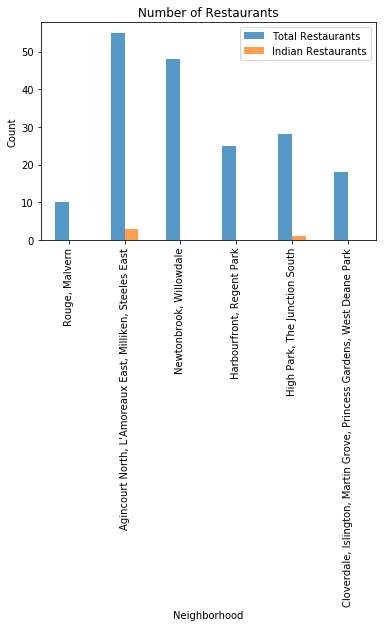

In [57]:
%matplotlib inline

ax = cluster.plot(x='Neighborhood',y=['Total Restaurants','Indian Restaurants'],kind='bar',alpha=0.75,title='Number of Restaurants')
ax.set_ylabel('Count')

Text(0, 0.5, 'Normalized Spending Power ($)')

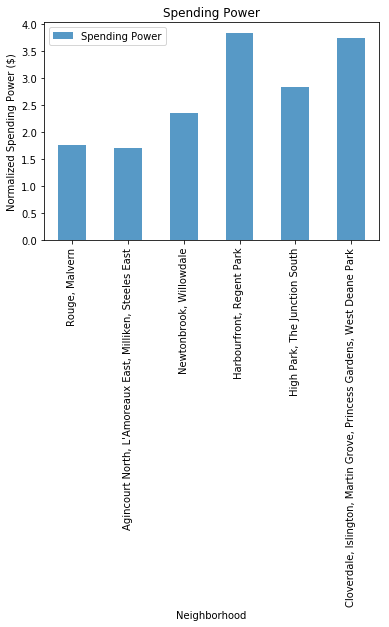

In [58]:
ax = cluster.plot(x='Neighborhood',y=['Spending Power'],kind='bar',alpha=0.75,title='Spending Power')
ax.set_ylabel('Normalized Spending Power ($)')

Text(0, 0.5, 'Population')

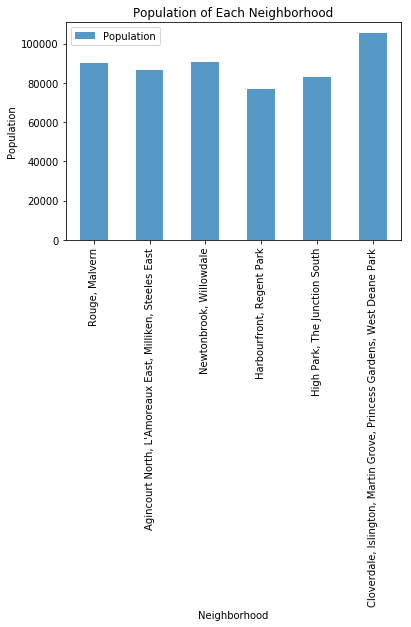

In [59]:
ax = cluster.plot(x='Neighborhood',y=['Population'],kind='bar',alpha=0.75,title='Population of Each Neighborhood')
ax.set_ylabel('Population')

Text(0, 0.5, 'Population (%)')

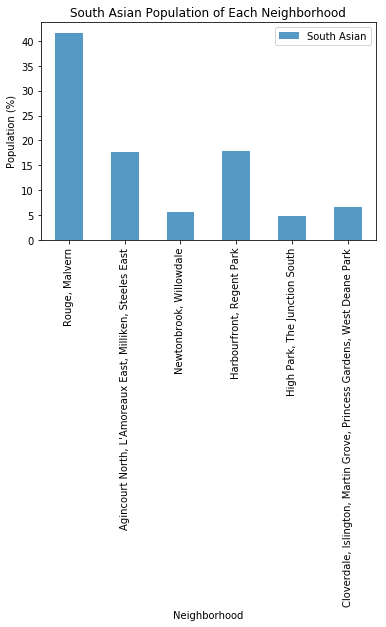

In [60]:
ax = cluster.plot(x='Neighborhood',y=['South Asian'],kind='bar',alpha=0.75,title='South Asian Population of Each Neighborhood')
ax.set_ylabel('Population (%)')

In [61]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,ires,sp in zip(cluster['Latitude'], cluster['Longitude'], cluster['Neighborhood'], cluster['Cluster Labels'],cluster['Total Restaurants'],cluster['Indian Restaurants'],cluster['Spending Power']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\nRestaurants: '+str(res) + '\nIndian Restaurants: '+str(ires) +'\nSpending: '+str(sp), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters